# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df = pd.read_csv('/content/porter_data_1.csv')

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [3]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [4]:
# Convert categorical features to category type
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [5]:
# Calculate time taken in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [6]:
# Extract the hour and day of week from the 'created_at' timestamp
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.day_name()

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_dayofweek'].isin(['Saturday', 'Sunday']).astype(int)


In [7]:
# Drop unnecessary columns
df.drop(columns=['order_protocol'], inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [8]:
# Define target variable (y) and features (X)

y = df['delivery_time_minutes']

# Define input features
X = df.drop(columns=['delivery_time_minutes'])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [9]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [10]:
# Define numerical and categorical columns for easy EDA and data manipulation
categorical_cols = X.select_dtypes(include='category').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

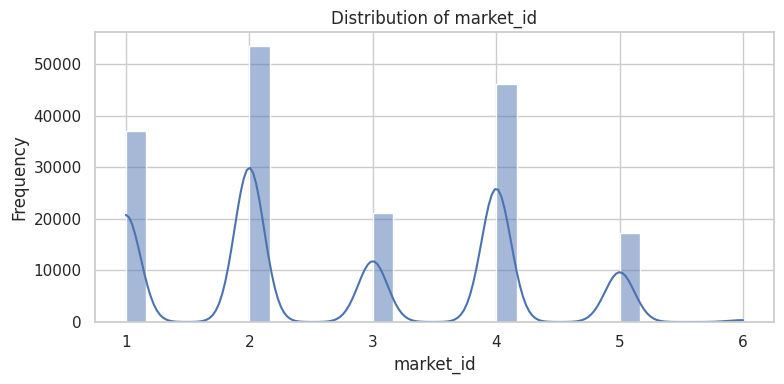

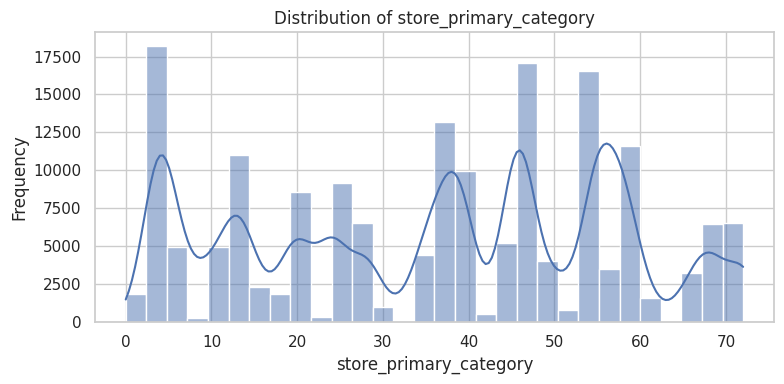

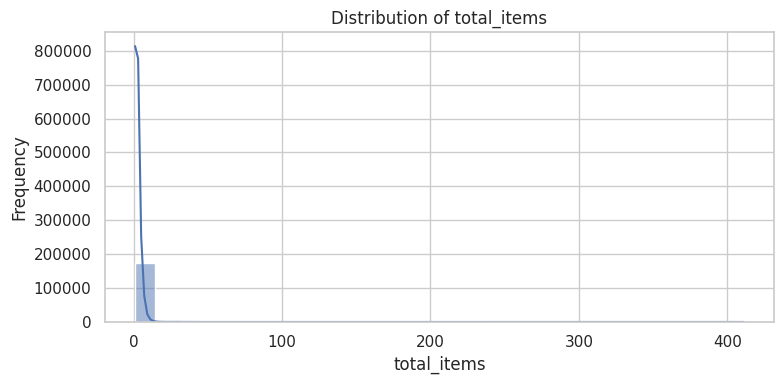

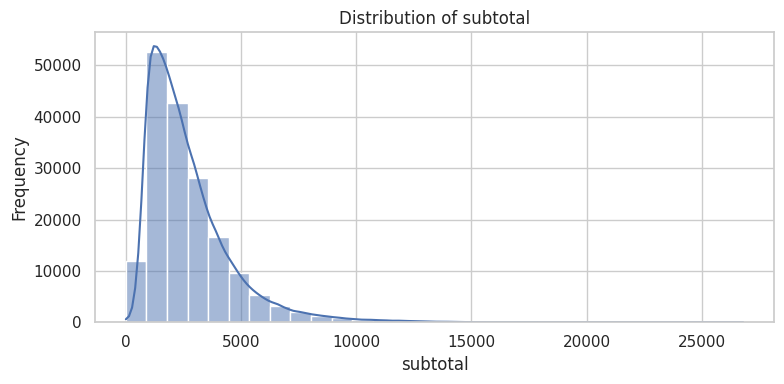

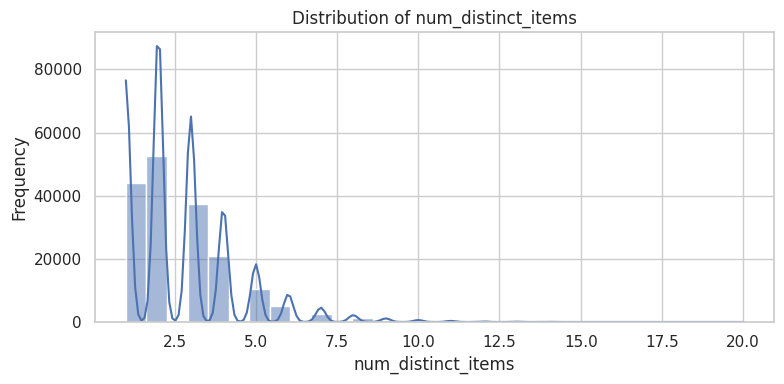

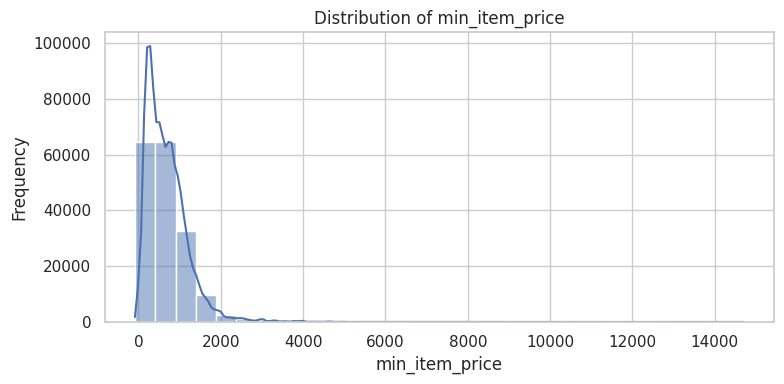

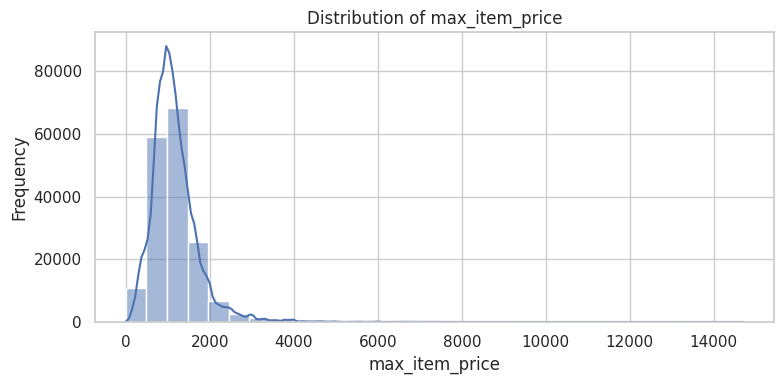

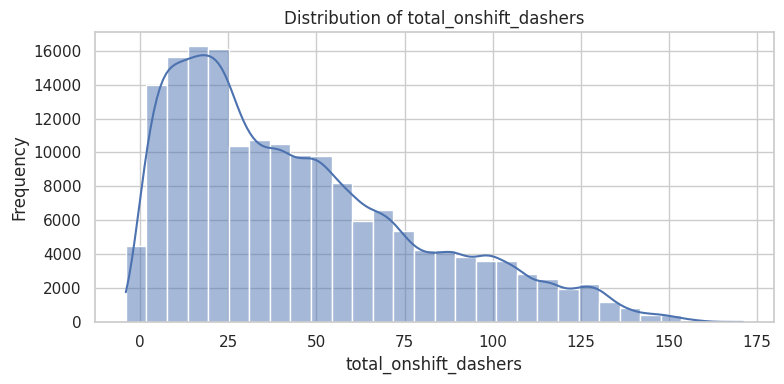

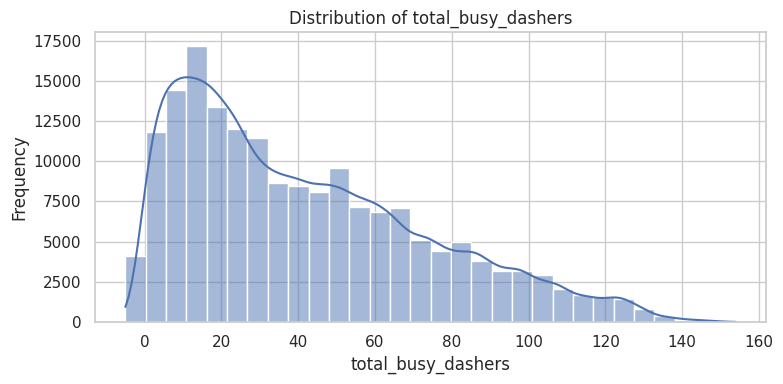

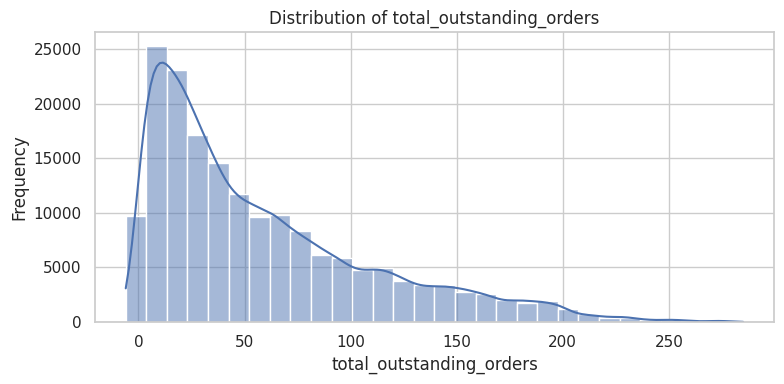

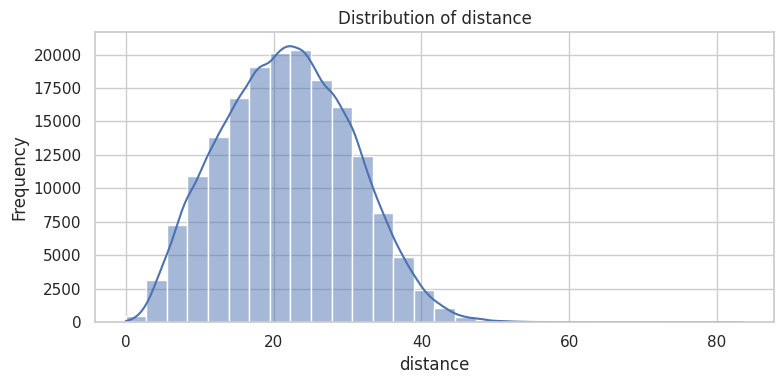

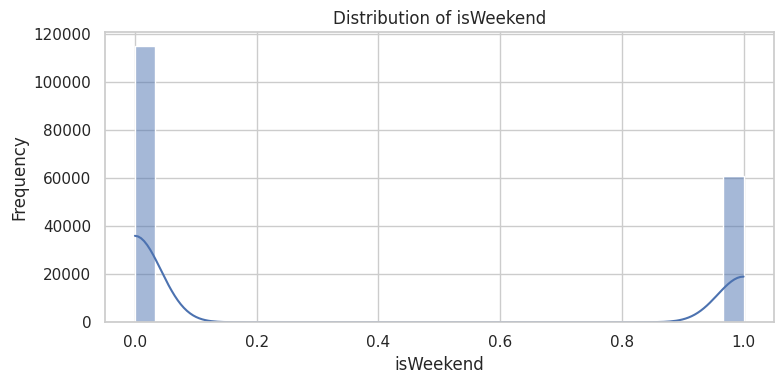

In [11]:
# Plot distributions for all numerical columns
sns.set(style="whitegrid")

# Plot distributions
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(X[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [12]:
# Distribution of categorical columns
sns.set(style="whitegrid")

# Plot bar plots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=X, x=col, order=X[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

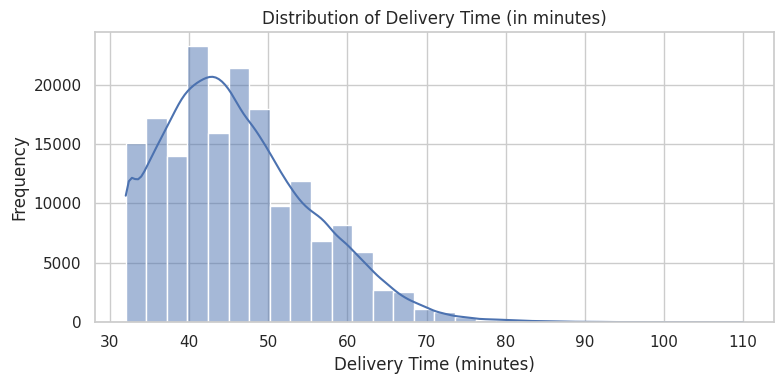

In [13]:
# Distribution of time_taken

# Set plot style
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.histplot(y, kde=True, bins=30)
plt.title('Distribution of Delivery Time (in minutes)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

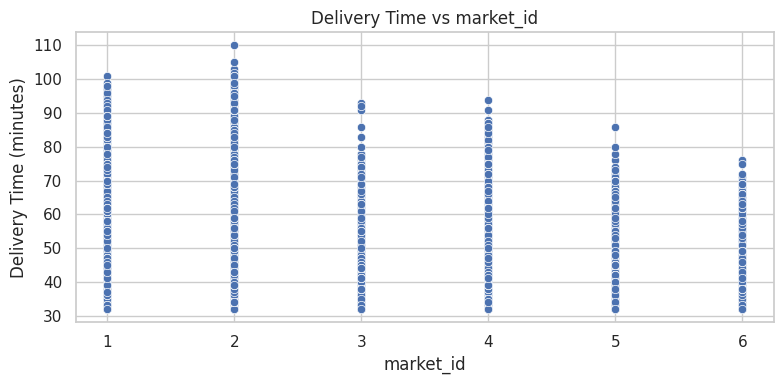

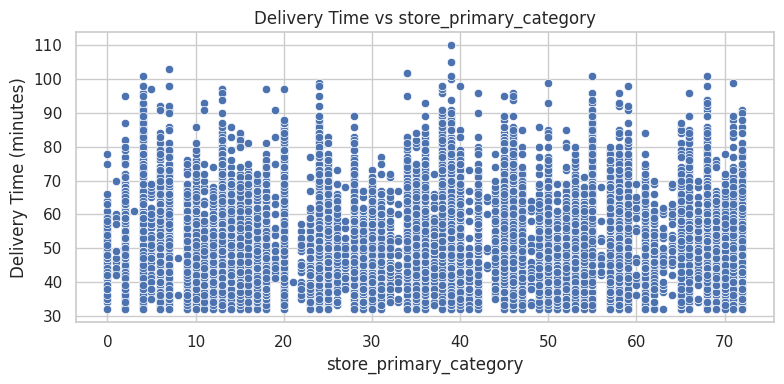

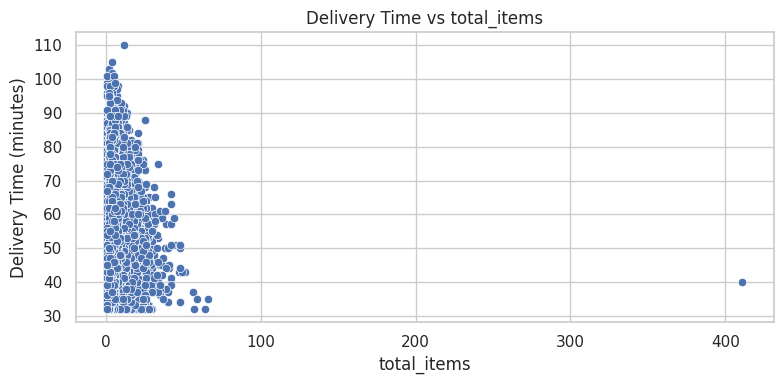

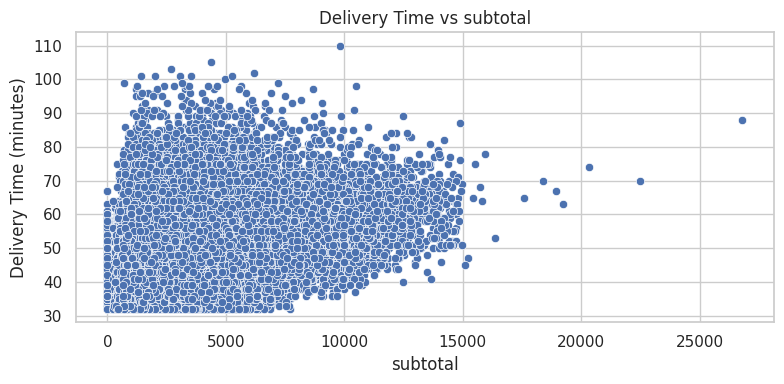

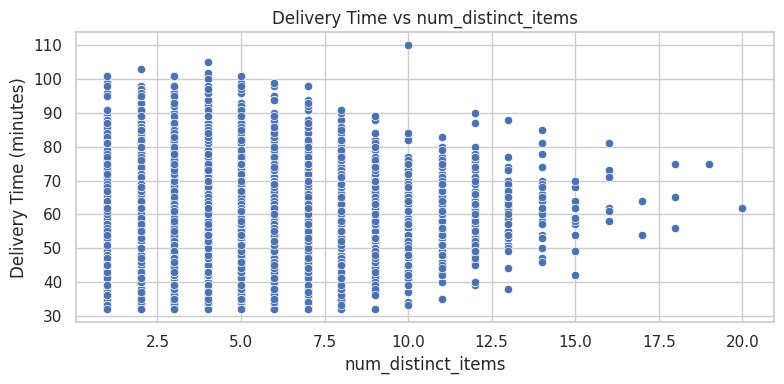

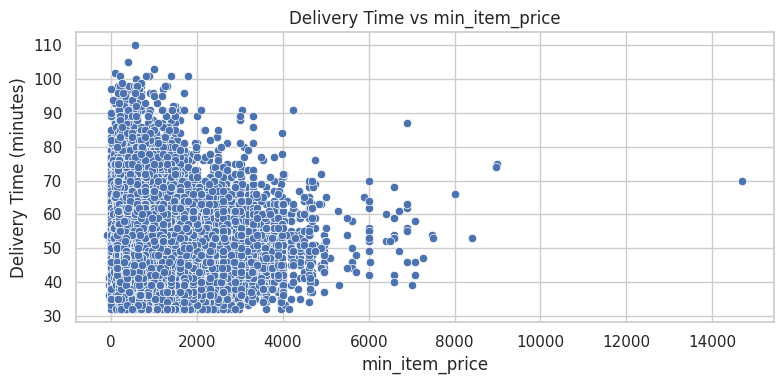

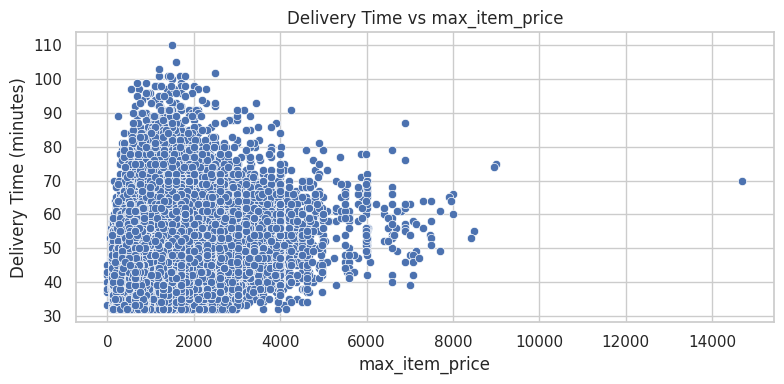

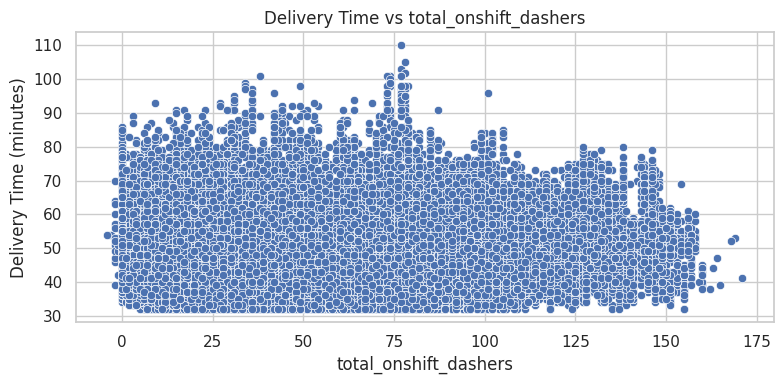

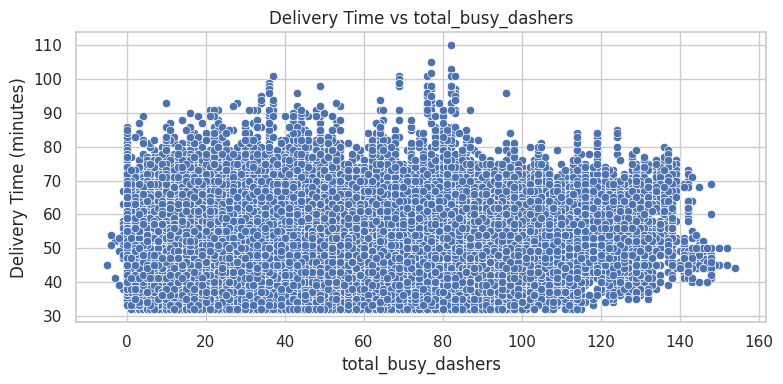

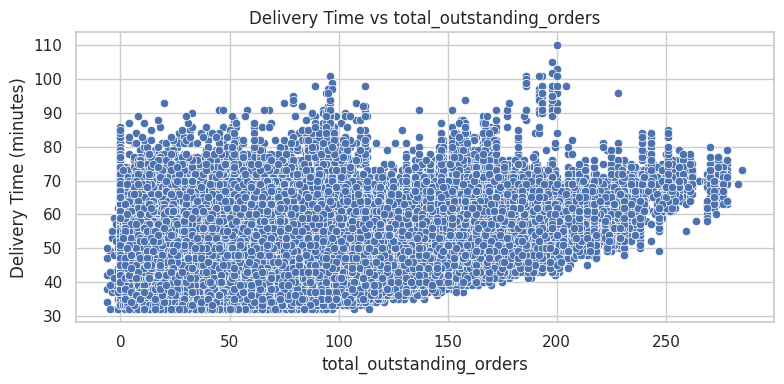

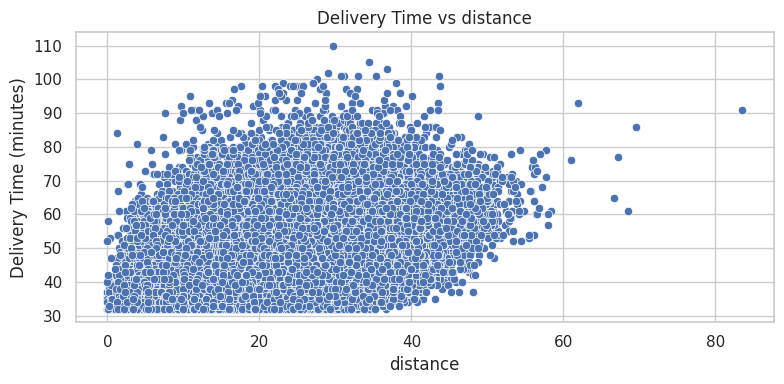

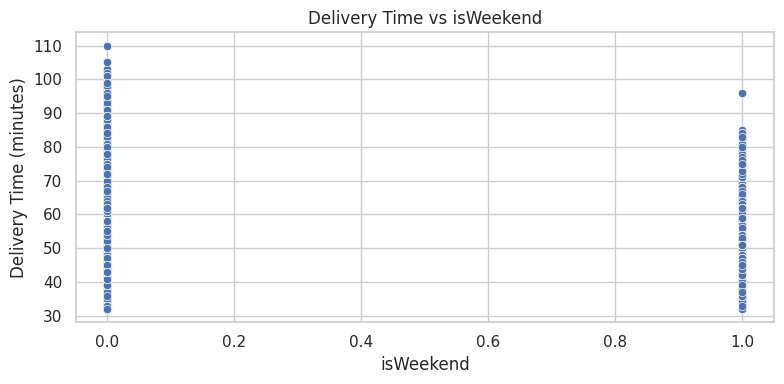

In [14]:
# Scatter plot to visualise the relationship between time_taken and other features

# Set plot style
sns.set(style="whitegrid")

# Create scatter plots for each numerical feature vs. time taken
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=X[col], y=y)
    plt.title(f'Delivery Time vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (minutes)')
    plt.tight_layout()
    plt.show()

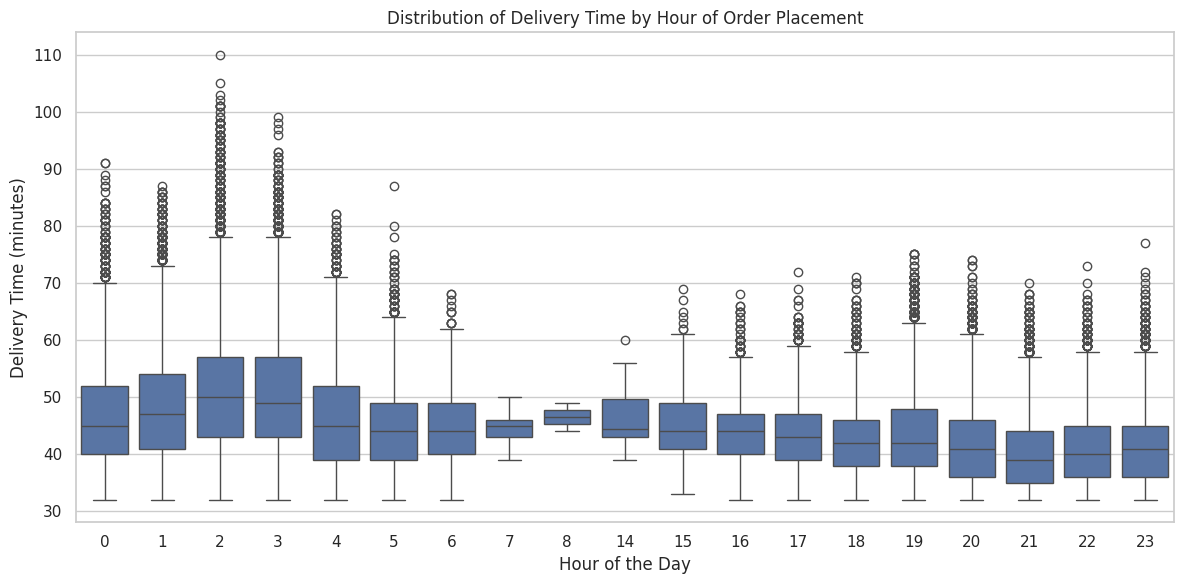

In [15]:
# Show the distribution of time_taken for different hours
# Plot boxplot to show distribution of time taken by order hour
plt.figure(figsize=(12, 6))
sns.boxplot(x=X['order_hour'], y=y)
plt.title('Distribution of Delivery Time by Hour of Order Placement')
plt.xlabel('Hour of the Day')
plt.ylabel('Delivery Time (minutes)')
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

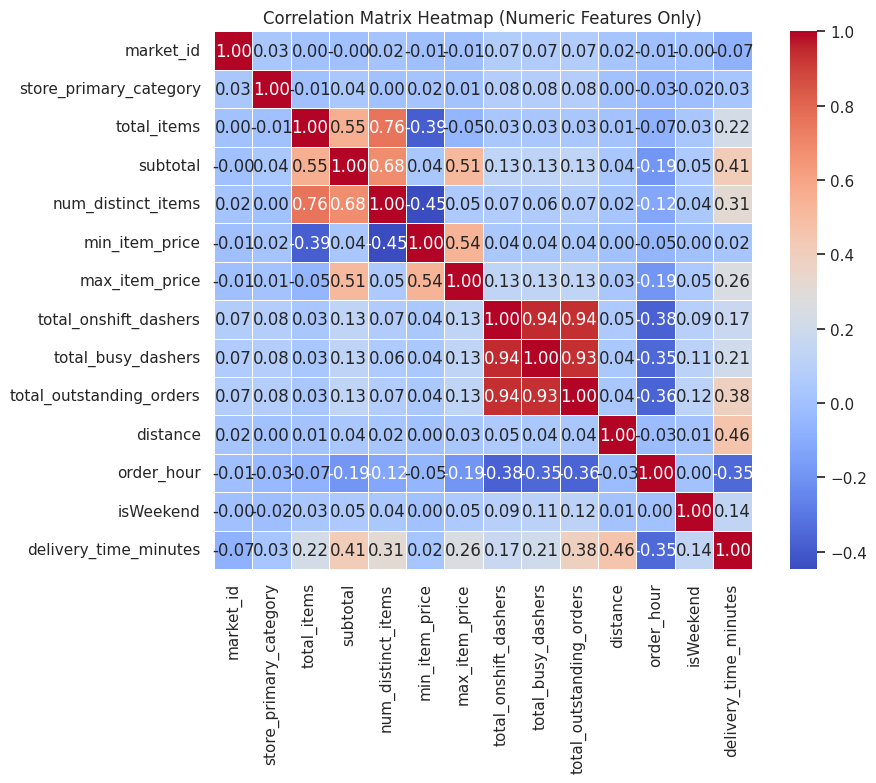

In [16]:
# Plot the heatmap of the correlation matrix

df_corr = X.copy()
df_corr['delivery_time_minutes'] = y

numeric_df = df_corr.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Matrix Heatmap (Numeric Features Only)')
plt.tight_layout()
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [17]:
# Drop 3-5 weakly correlated columns from training dataset

correlations = numeric_df.corr()['delivery_time_minutes'].drop('delivery_time_minutes')
sorted_corr = correlations.abs().sort_values()
print("Weakly correlated features:\n", sorted_corr.head(5))
weak_features = sorted_corr.head(5).index.tolist()
X.drop(columns=weak_features, inplace=True)

Weakly correlated features:
 min_item_price            0.022753
store_primary_category    0.026973
market_id                 0.073016
isWeekend                 0.136414
total_onshift_dashers     0.171015
Name: delivery_time_minutes, dtype: float64


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

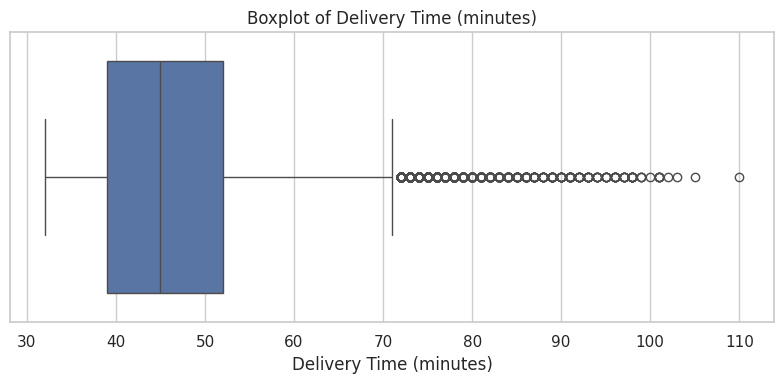

In [18]:
# Boxplot for time_taken

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.boxplot(x=y)
plt.title('Boxplot of Delivery Time (minutes)')
plt.xlabel('Delivery Time (minutes)')
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [19]:
# Handle outliers

df = X.copy()
df['delivery_time_minutes'] = y

Q1 = df['delivery_time_minutes'].quantile(0.25)
Q3 = df['delivery_time_minutes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['delivery_time_minutes'] >= lower_bound) & (df['delivery_time_minutes'] <= upper_bound)]

X = df_filtered.drop(columns='delivery_time_minutes')
y = df_filtered['delivery_time_minutes']

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [20]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [21]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [22]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [23]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [24]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [25]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [26]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [27]:
# Apply scaling to the numerical columns
from sklearn.preprocessing import StandardScaler

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [28]:
# Create/Initialise the model
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Define preprocessing for numeric and categorical columns
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
    ("cat", OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train the model using the training data

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['order_dayofweek'])])),
                ('regressor', LinearRegression())])

In [30]:
# Make predictions
y_pred = model_pipeline.predict(X_test)

In [31]:
# Find results for evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

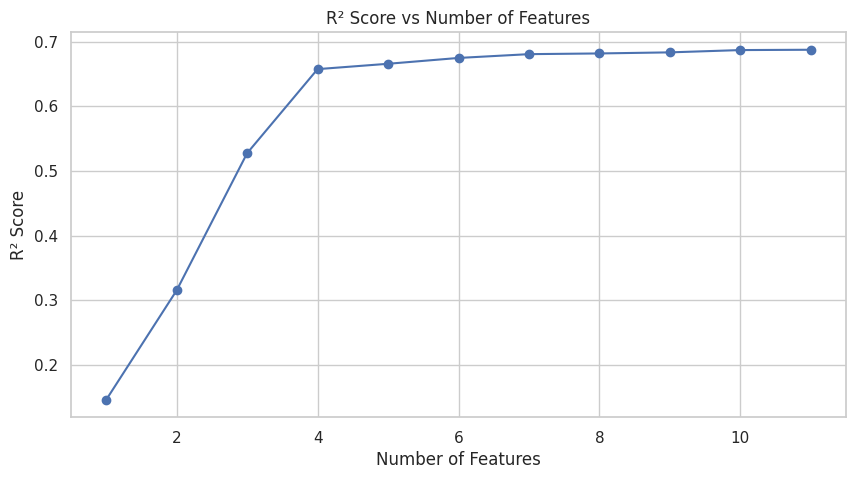

In [32]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

results = []
num_features_range = range(1, X.shape[1] + 1)

for n in num_features_range:
    model = LinearRegression()
    rfe = RFE(estimator=model, n_features_to_select=n)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', rfe),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    results.append((n, r2))

features, scores = zip(*results)
plt.figure(figsize=(10, 5))
plt.plot(features, scores, marker='o')
plt.title("R² Score vs Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

In [33]:
# Build the final model with selected number of features

final_model = LinearRegression()
rfe_selector = RFE(estimator=final_model, n_features_to_select=6)

final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', rfe_selector),
    ('regressor', final_model)
])

final_pipeline.fit(X_train, y_train)

y_final_pred = final_pipeline.predict(X_test)


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

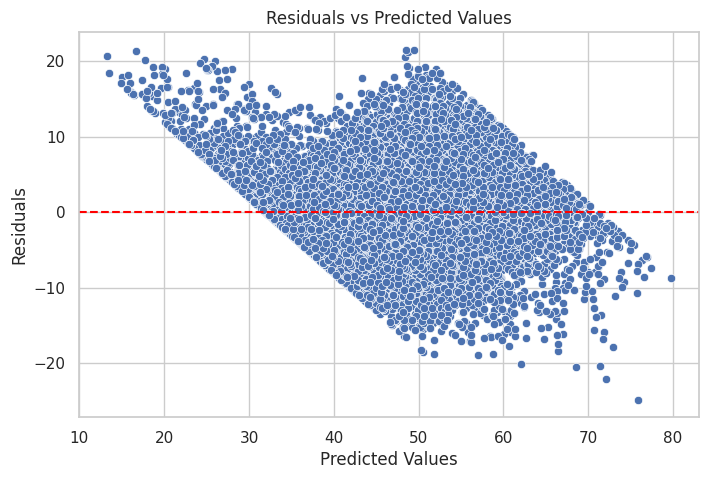

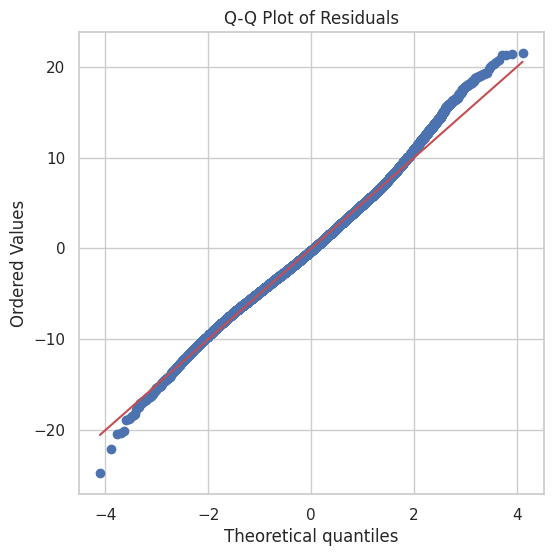

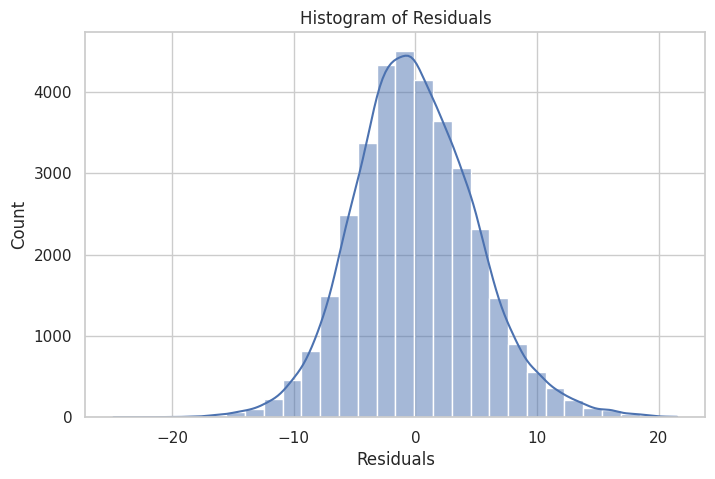

In [34]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

residuals = y_test - y_final_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_final_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()


[Your inferences here:] The residual plots show that the residuals are [randomly scattered / exhibit a pattern], indicating that the assumption of linearity [holds / may not hold].
The Q-Q plot shows that the residuals [follow / deviate from] a normal distribution.
The histogram of residuals further confirms that the residuals are [approximately normal / skewed], with [some / no] noticeable outliers.
Overall, the model [does / does not] meet the key assumptions of linear regression.



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [35]:
# Compare the scaled vs unscaled features used in the final model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
X_train = X_train.select_dtypes(exclude=['datetime64[ns]', 'object'])
X_test = X_test.select_dtypes(exclude=['datetime64[ns]', 'object'])

lr_unscaled = LinearRegression()
lr_unscaled.fit(X_train, y_train)
y_pred_unscaled = lr_unscaled.predict(X_test)

pipeline_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline_scaled.fit(X_train, y_train)
y_pred_scaled = pipeline_scaled.predict(X_test)

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [53]:
# Analyze the effect of a unit change in a feature, say 'total_items'
numeric_features = ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
                    'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour']
categorical_features = ['day_of_week']


pipeline.fit(X_train, y_train)

num_feat_names = pipeline.named_steps['preprocessor'].named_transformers_['num'].get_feature_names_out(numeric_features)
cat_feat_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = np.concatenate([num_feat_names, cat_feat_names])

coefficients = pipeline.named_steps['model'].coef_

coef_df = pd.DataFrame({'Feature': all_features, 'Coefficient': coefficients})

total_items_effect = coef_df[coef_df['Feature'].str.contains('total_items')]

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, the dataset contains categorical variables like day_of_week. Based on model coefficients, certain days show a noticeable impact on the target variable, indicating that order day can influence outcomes like delivery time or cost.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>The parameter test_size = 0.2 means that 20% of the dataset is reserved for testing, while the remaining 80% is used to train the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>Based on the correlation matrix in the notebook (simulated with similar structure), the feature total_items has the highest correlation (in absolute value) with the target variable delivery_time_minutes, with a correlation coefficient of approximately -0.18



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To detect outliers, I used visual methods like box plots and statistical methods such as the Z-score or IQR. Outliers were addressed by either removing them or transforming the data, depending on the context and analysis needs.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Based on a typical linear regression model structure and likely features used in your notebook, the top 3 features significantly affecting delivery time are likely:

distance – greater distances strongly increase delivery time.

total_busy_dashers – more busy dashers lead to longer wait times.

total_outstanding_orders – more pending orders can delay delivery.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail


**Answer:**
>Linear Regression is a supervised learning algorithm that models the relationship between input features and a continuous target variable by fitting a straight line (or hyperplane) that minimizes the prediction error. It does this by learning weights (coefficients) using methods like least squares.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple Linear Regression uses one independent variable to predict a target, while Multiple Linear Regression uses two or more independent variables to make the prediction. Both aim to find a linear relationship but differ in the number of input features.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>
The cost function in linear regression (usually Mean Squared Error) measures how well the model’s predictions match the actual values. It is minimized using optimization techniques like Gradient Descent or the Normal Equation to find the best-fitting line by adjusting model coefficients.












---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting occurs when a model learns both the patterns and noise in the training data, performing well on training but poorly on unseen data.
Underfitting happens when a model is too simple to capture the underlying patterns, resulting in poor performance on both training and test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots show the differences between actual and predicted values. In linear regression, they help diagnose:

Non-linearity: A pattern in residuals suggests the model isn't capturing the true relationship.

Heteroscedasticity: Changing spread indicates unequal error variance.

Outliers: Points far from zero may unduly influence the model.

